In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
from datetime import datetime

%matplotlib inline

# Impor the OpenWeatherMap API key
from config import api_key

In [2]:
#Skip running this cell if your API limit is reached
#Variables used in API call, oldest date is furthest back we are willing to go
oldest_date = "2014-01-31"
company_ticker = ["TAN", "ENPH", "SEDG", "FSLR", "HYDR", "PLUG", "BLDP", "BE", "FAN", "TAC", "TPIC", "AMSC"]
time_function = "TIME_SERIES_MONTHLY"
base_url = "https://www.alphavantage.co/query?"

company_data = []

for ticker in company_ticker:
    finished_url = f"{base_url}function={time_function}&symbol={ticker}&apikey={api_key}"
    print(f"Processing {ticker}")

    result_data = requests.get(finished_url).json()

    time.sleep(1)

    for monthly in result_data["Monthly Time Series"]:
        monthly_date = time.strptime(monthly, "%Y-%m-%d")
        oldest = time.strptime(oldest_date, "%Y-%m-%d")
        if (monthly_date < oldest):
            continue
        stock_date = monthly
        stock_close = result_data["Monthly Time Series"][monthly]["4. close"]
        company_data.append({"Ticker":ticker,
                            "Date":stock_date,
                            "Closing Price":stock_close})

company_data_df = pd.DataFrame(company_data)
company_data_df['Date'] = pd.to_datetime(company_data_df['Date'])
company_data_df


Processing TAN
Processing ENPH
Processing SEDG
Processing FSLR
Processing HYDR
Processing PLUG
Processing BLDP
Processing BE
Processing FAN
Processing TAC
Processing TPIC
Processing AMSC


,Ticker,Date,Closing Price
0,TAN,2024-09-20,40.6600
1,TAN,2024-08-30,41.2800
2,TAN,2024-07-31,42.1300
3,TAN,2024-06-28,40.2100
4,TAN,2024-05-31,48.2800
...,...,...,...
1351,AMSC,2014-05-30,1.4000
1352,AMSC,2014-04-30,1.2800
1353,AMSC,2014-03-31,1.6100
1354,AMSC,2014-02-28,1.8500


In [3]:
#Skip running this cell if your API limit is reached
#Add a type column and lable to each stock
company_data_df["Type"] = ""
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "TAN", "Solar", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "ENPH", "Solar", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "SEDG", "Solar", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "FSLR", "Solar", company_data_df["Type"])

company_data_df["Type"] = np.where(company_data_df["Ticker"] == "HYDR", "Hydrogen", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "PLUG", "Hydrogen", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "BLDP", "Hydrogen", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "BE", "Hydrogen", company_data_df["Type"])

company_data_df["Type"] = np.where(company_data_df["Ticker"] == "FAN", "Wind", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "TAC", "Wind", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "TPIC", "Wind", company_data_df["Type"])
company_data_df["Type"] = np.where(company_data_df["Ticker"] == "AMSC", "Wind", company_data_df["Type"])

#Save the Data pulled to a CSV file
company_data_df.to_csv("data/company_data.csv", index_label="Stock_ID") #change stock id 

In [4]:
#prep some lists for the later code to use
company_ticker = ["TAN", "ENPH", "SEDG", "FSLR", "HYDR", "PLUG", "BLDP", "BE", "FAN", "TAC", "TPIC", "AMSC"]
solar_tickers = ["TAN", "ENPH", "SEDG", "FSLR"]
hydrogen_tickers = ["BLDP", "PLUG", "BE", "HYDR"]
wind_tickers = ["FAN", "TAC", "TPIC", "AMSC"]
year_list = [i for i in range(2014, 2025)]

#Read data from the saved CSV file and sort it by Ticker and date
read_data_df = pd.read_csv("data/company_data.csv", index_col="Stock_ID") #change stock id
read_data_df['Date'] = pd.to_datetime(read_data_df['Date'])
ordered_data_df = read_data_df.sort_values(by=["Ticker", "Date"])
ordered_data_df

,Ticker,Date,Closing Price,Type
Stock_ID,,,,
1355,AMSC,2014-01-31,1.50,Wind
1354,AMSC,2014-02-28,1.85,Wind
1353,AMSC,2014-03-31,1.61,Wind
1352,AMSC,2014-04-30,1.28,Wind
1351,AMSC,2014-05-30,1.40,Wind
...,...,...,...,...
1133,TPIC,2024-05-31,5.48,Wind
1132,TPIC,2024-06-28,3.99,Wind
1131,TPIC,2024-07-31,4.26,Wind


In [5]:
#Function to plot graphs showing stock prices
def plot_stock_prices(tickers,given_data_df,type):
    plt.figure(figsize=(8, 6))

    for ticker in tickers:
        stock_data = given_data_df[given_data_df["Ticker"] == ticker]
        plt.plot(stock_data["Date"], stock_data["Closing Price"], label=ticker)

    plt.title(f"Stock Prices for {type} Companies")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks every month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graphs/{type}-stocks.png")
    plt.show()

In [6]:
#Function to plot graphs showing average yearly stock prices
def plot_avg_prices(tickers,given_data_df,type):
    plt.figure(figsize=(8, 6))

    for ticker in tickers:
        stock_data = given_data_df[given_data_df["Ticker"] == ticker]
        plt.plot(stock_data["Year"], stock_data["Avg. Closing Price"], label=ticker)

    plt.title(f"Avg. Yealy Stock Prices for {type} Companies")
    plt.xlabel("Year")
    plt.ylabel("Avg. Closing Price")
    plt.xticks(ticks=year_list, labels=[str(i) for i in year_list], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graphs/{type}-avg-yearly-stocks.png")
    plt.show()

In [7]:
#Function to plot graphs showing max yearly stock prices
def plot_max_prices(tickers,given_data_df,type):
    plt.figure(figsize=(8, 6))

    for ticker in tickers:
        stock_data = given_data_df[given_data_df["Ticker"] == ticker]
        plt.plot(stock_data["Year"], stock_data["Max Closing Price"], label=ticker)

    plt.title(f"Max Yealy Stock Prices for {type} Companies")
    plt.xlabel("Year")
    plt.ylabel("Max Closing Price")
    plt.xticks(ticks=year_list, labels=[str(i) for i in year_list], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graphs/{type}-max-yearly-stocks.png")
    plt.show()

In [8]:
#Function to plot graphs showing average yearly stock prices by company Sector
def plot_avg_type_prices(types,given_data_df):
    plt.figure(figsize=(8, 6))

    for type in types:
        stock_data = given_data_df[given_data_df["Type"] == type]
        plt.plot(stock_data["Year"], stock_data["Avg. Closing Price"], label=type)

    plt.title(f"Avg. Yealy Stock Prices by Sector")
    plt.xlabel("Year")
    plt.ylabel("Avg. Closing Price")
    plt.xticks(ticks=year_list, labels=[str(i) for i in year_list], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graphs/sector-avg-yearly-stocks.png")
    plt.show()

In [9]:
#Function to plot graphs showing max yearly stock prices by company Sector
def plot_max_type_prices(types,given_data_df):
    plt.figure(figsize=(8, 6))

    for type in types:
        stock_data = given_data_df[given_data_df["Type"] == type]
        plt.plot(stock_data["Year"], stock_data["Max Closing Price"], label=type)

    plt.title(f"Max Yealy Stock Prices by Sector")
    plt.xlabel("Year")
    plt.ylabel("Avg. Closing Price")
    plt.xticks(ticks=year_list, labels=[str(i) for i in year_list], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"graphs/sector-max-yearly-stocks.png")
    plt.show()

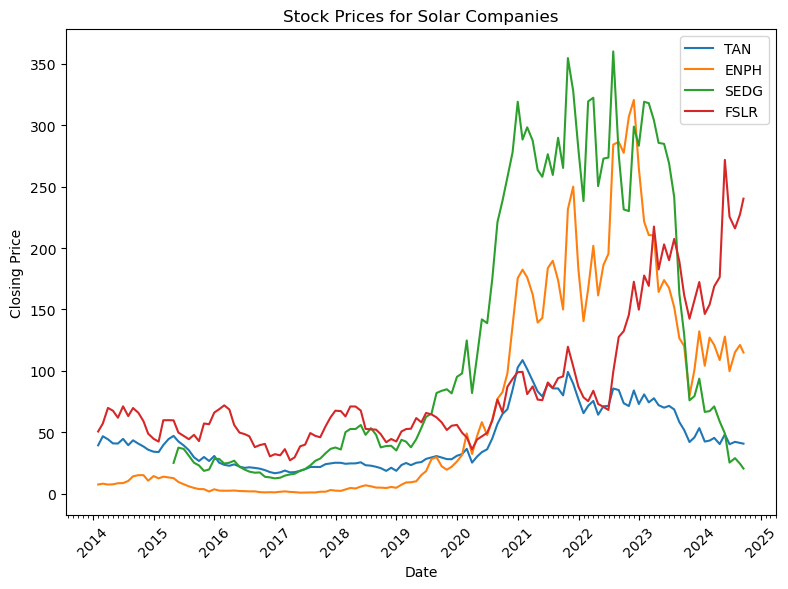

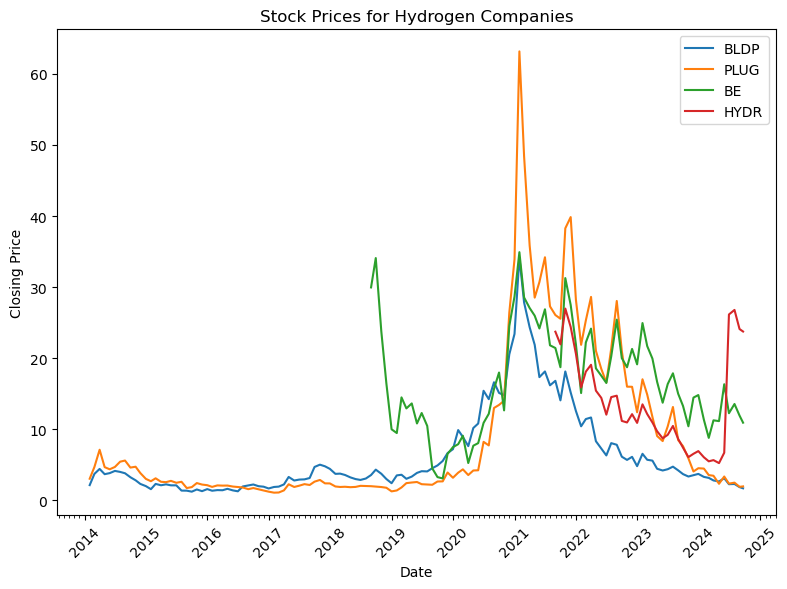

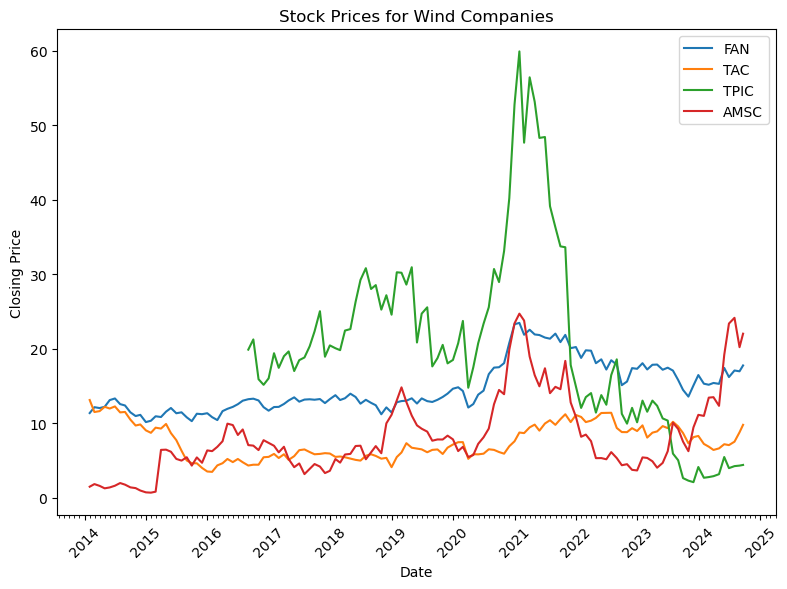

In [10]:
# Plot Stocks for each company
plot_stock_prices(solar_tickers,ordered_data_df,"Solar")
plot_stock_prices(hydrogen_tickers,ordered_data_df,"Hydrogen")
plot_stock_prices(wind_tickers,ordered_data_df,"Wind")

In [11]:
#Yearly Average stock price for each company
yearly_average = []
for ticker in company_ticker:
    starting_year = ordered_data_df[ordered_data_df["Ticker"] == ticker]["Date"].min().strftime('%Y')
    for year in range(int(starting_year), 2025):
        years = ordered_data_df["Date"].dt.strftime('%Y')
        average = ordered_data_df.loc[(ordered_data_df["Ticker"] == ticker) & (years == str(year)), "Closing Price"].mean()
        yearly_average.append({"Ticker":ticker,
                                "Year":year,
                                "Avg. Closing Price":average,
                                "Type":ordered_data_df.loc[ordered_data_df["Ticker"] == ticker,"Type"].iloc[0]})

yearly_average_df = pd.DataFrame(yearly_average)
yearly_average_df  

,Ticker,Year,Avg. Closing Price,Type
0,TAN,2014,40.676667,Solar
1,TAN,2015,35.406667,Solar
2,TAN,2016,21.162500,Solar
3,TAN,2017,20.658333,Solar
4,TAN,2018,22.540833,Solar
...,...,...,...,...
113,AMSC,2020,11.107500,Wind
114,AMSC,2021,16.824167,Wind
115,AMSC,2022,5.664167,Wind
116,AMSC,2023,7.037083,Wind


In [12]:
#Yearly max stock price for each company
yearly_max = []
for ticker in company_ticker:
    starting_year = ordered_data_df[ordered_data_df["Ticker"] == ticker]["Date"].min().strftime('%Y')
    for year in range(int(starting_year), 2025):
        years = ordered_data_df["Date"].dt.strftime('%Y')
        max = ordered_data_df.loc[(ordered_data_df["Ticker"] == ticker) & (years == str(year)), "Closing Price"].max()
        yearly_max.append({"Ticker":ticker,
                                "Year":year,
                                "Max Closing Price":max,
                                "Type":ordered_data_df.loc[ordered_data_df["Ticker"] == ticker,"Type"].iloc[0]})

yearly_max_df = pd.DataFrame(yearly_max)
yearly_max_df

,Ticker,Year,Max Closing Price,Type
0,TAN,2014,46.70,Solar
1,TAN,2015,47.00,Solar
2,TAN,2016,25.21,Solar
3,TAN,2017,25.13,Solar
4,TAN,2018,25.48,Solar
...,...,...,...,...
113,AMSC,2020,23.42,Wind
114,AMSC,2021,24.72,Wind
115,AMSC,2022,8.49,Wind
116,AMSC,2023,11.14,Wind


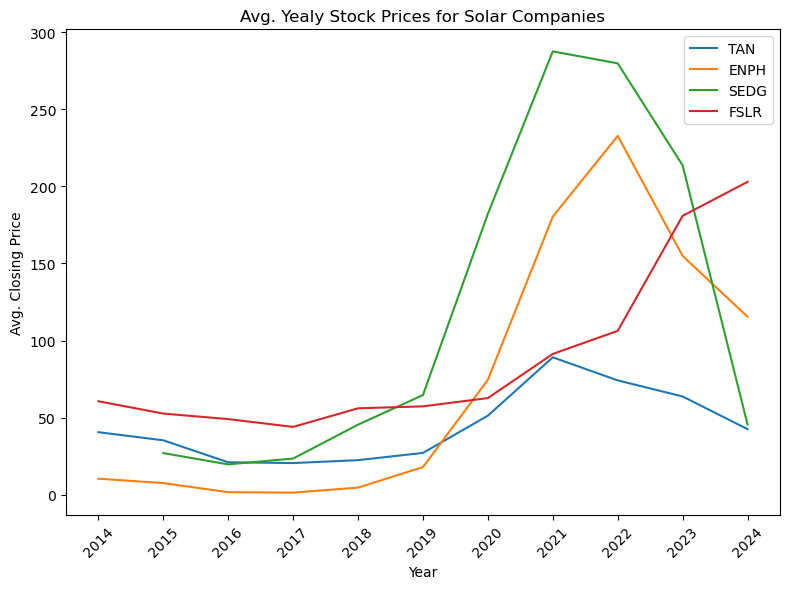

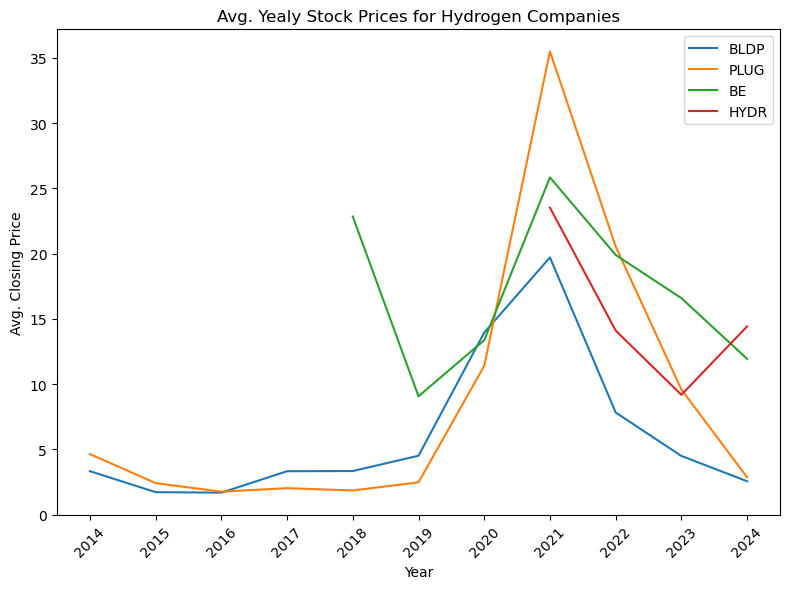

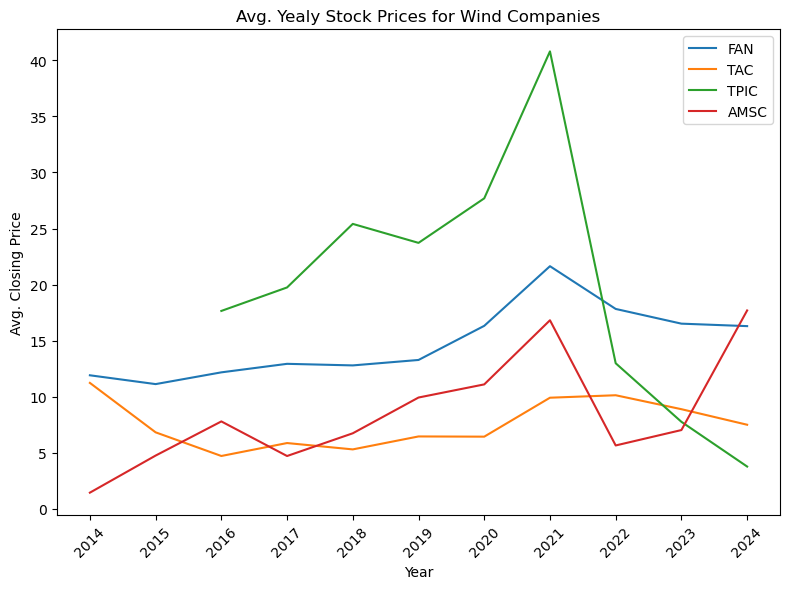

In [13]:
#Plot Avg. Yearly Stock Prices for each company
plot_avg_prices(solar_tickers,yearly_average_df,"Solar")
plot_avg_prices(hydrogen_tickers,yearly_average_df,"Hydrogen")
plot_avg_prices(wind_tickers,yearly_average_df,"Wind")

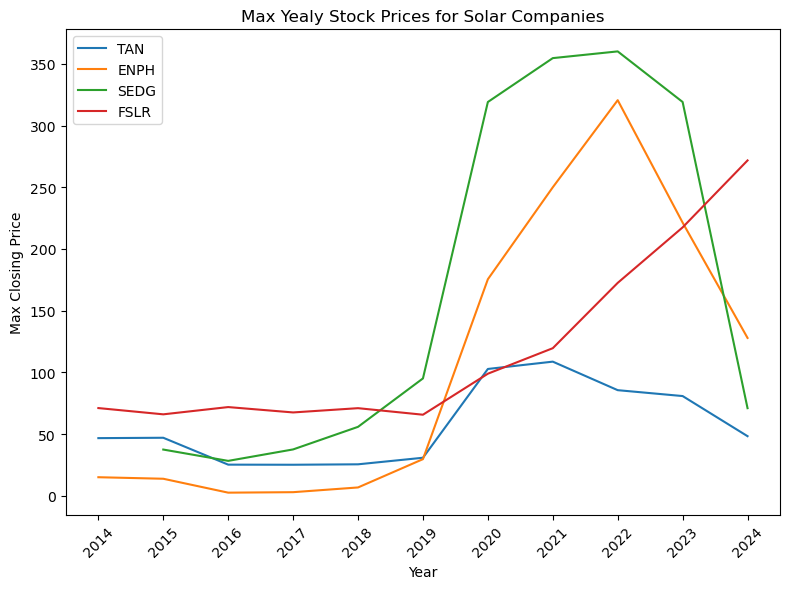

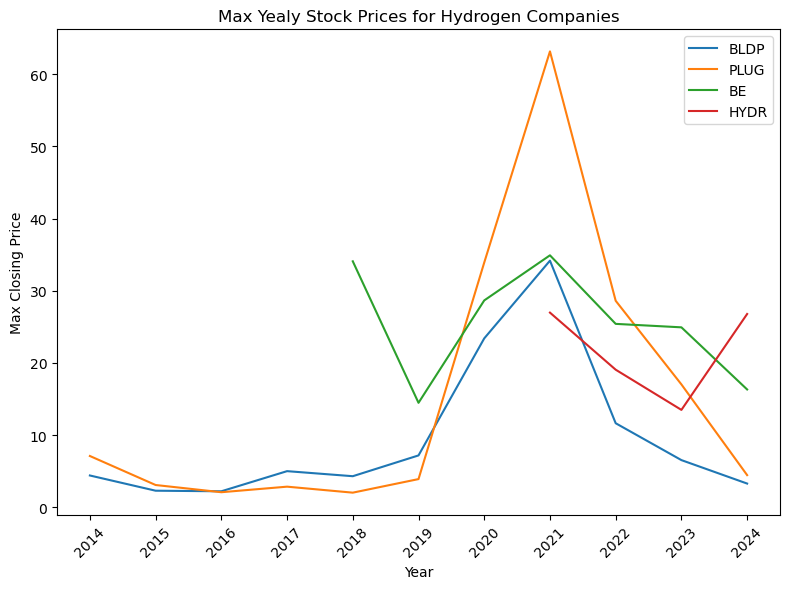

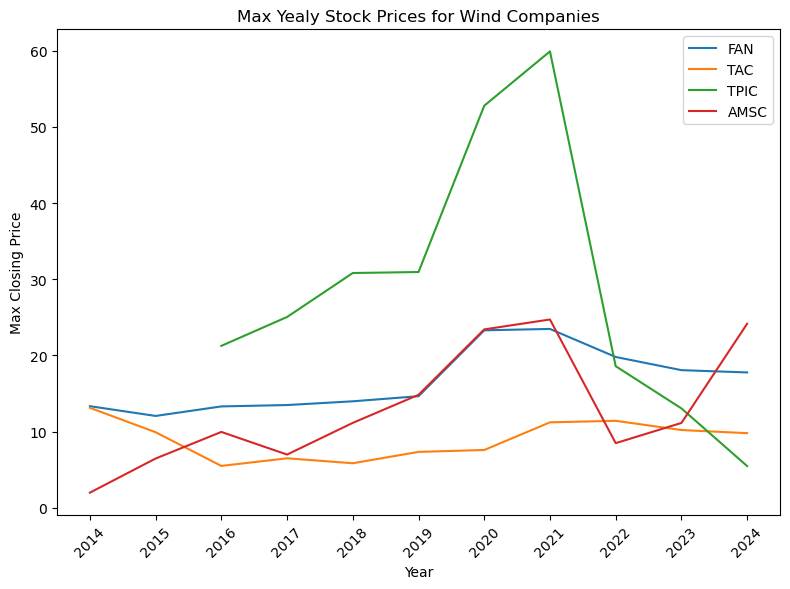

In [14]:
#Plot Max Yearly Stock Prices for each company
plot_max_prices(solar_tickers,yearly_max_df,"Solar")
plot_max_prices(hydrogen_tickers,yearly_max_df,"Hydrogen")
plot_max_prices(wind_tickers,yearly_max_df,"Wind")

In [15]:
#Yearly Average stock price for each sector
yearly_average_sector = []
for types in ordered_data_df["Type"].unique():
    starting_year = ordered_data_df[ordered_data_df["Type"] == types]["Date"].min().strftime('%Y')
    for year in range(int(starting_year), 2025):
        years = ordered_data_df["Date"].dt.strftime('%Y')
        average = ordered_data_df.loc[(ordered_data_df["Type"] == types) & (years == str(year)), "Closing Price"].mean()
        yearly_average_sector.append({"Type":types,
                                "Year":year,
                                "Avg. Closing Price":average,})

yearly_avg_sector_df = pd.DataFrame(yearly_average_sector)
yearly_avg_sector_df

,Type,Year,Avg. Closing Price
0,Wind,2014,8.205578
1,Wind,2015,7.576700
2,Wind,2016,9.386361
3,Wind,2017,10.823098
4,Wind,2018,12.569167
5,Wind,2019,13.352917
6,Wind,2020,15.393542
7,Wind,2021,22.294583
8,Wind,2022,11.657373
9,Wind,2023,10.056558


In [16]:
#Yearly Max stock price for each sector
yearly_max_sector = []
for types in ordered_data_df["Type"].unique():
    starting_year = ordered_data_df[ordered_data_df["Type"] == types]["Date"].min().strftime('%Y')
    for year in range(int(starting_year), 2025):
        years = ordered_data_df["Date"].dt.strftime('%Y')
        max = ordered_data_df.loc[(ordered_data_df["Type"] == types) & (years == str(year)), "Closing Price"].max()
        yearly_max_sector.append({"Type":types,
                                "Year":year,
                                "Max Closing Price":max,})

yearly_max_sector_df = pd.DataFrame(yearly_max_sector)
yearly_max_sector_df

,Type,Year,Max Closing Price
0,Wind,2014,13.34
1,Wind,2015,12.06
2,Wind,2016,21.26
3,Wind,2017,25.05
4,Wind,2018,30.82
5,Wind,2019,30.95
6,Wind,2020,52.78
7,Wind,2021,59.91
8,Wind,2022,19.80
9,Wind,2023,18.07


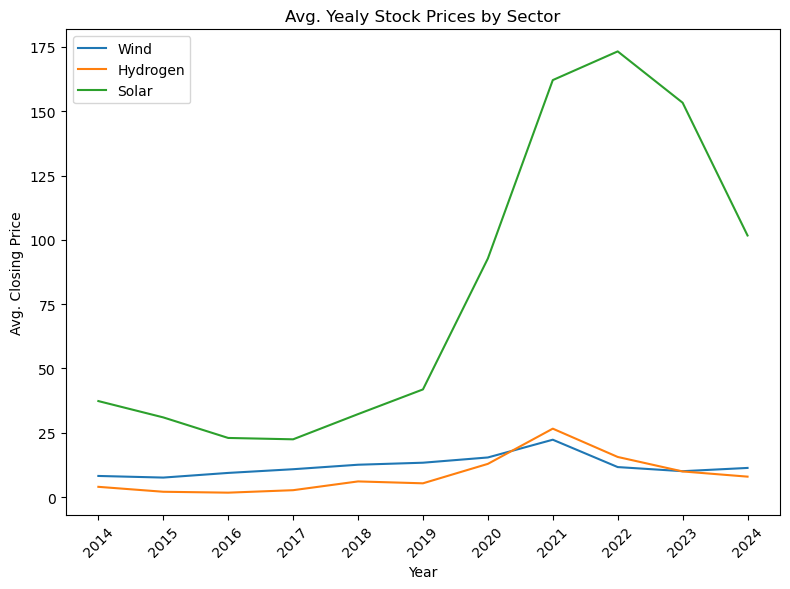

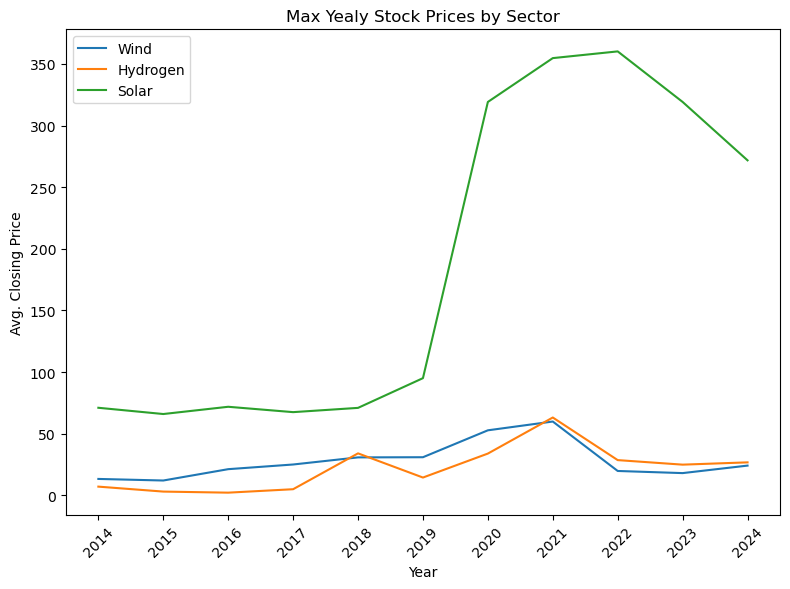

In [17]:
#Plot Avg and Max yearly stock prices by sector
plot_avg_type_prices(["Wind", "Hydrogen", "Solar"],yearly_avg_sector_df)
plot_max_type_prices(["Wind", "Hydrogen", "Solar"],yearly_max_sector_df)